# Justification for Existing over Trained

## Overview

Initially I had built a Convolutional Neural Network [CNN] model to learn the image classifiers as seen below. In the sample it shows only one epoch. I initially trained it using ten with a resulting 92.4% accuracy on the FMNIST dataset. I looked at other datasets such as MS-COCO and ImageNet as well but ultimately didn't go with this approach. Given more time I would have tested both of those further.

## Factors

I'll discuss each of the below factors in detail and how they played a part in my decision. 

1. Don't Reinvent the Wheel
2. Time Constraints
3. Multi-Label vs. Single-Label
4. Training Dataset/Simplicity

### Don't Reinvent the Wheel

I thought to put this one last because it seems more like an excuse than a justification, but I think it's important. Given the fact that there is a very robust, accessible, and well tested Multi-Label classifier in existence it would have been foolish of me to create my own unless there were very apparent shortcomings of this method. Not to mention it was free. I couldn't have replicated the output of this model given only a weeks time which made the decision easy. I wanted results.

### Time Constraints

Because the assignment was not only to classify the images and the expected delivery was roughly a week it meant that at most you would probably only have two or three days to complete the classification component. To get a model created in that time isn't necessarily an impossible feat as seen below. CNN models are quite easy to build using Keras, however in order to fine tune the model and test it on the resonance dataset, it would have taken more time and likely would have limited me to only being able to complete this component of the assignment.

### Multi-Label vs. Single-Label

The complexity of a model is significantly increased when you add multipart classification. For example if you look at the following output
```
Apparel->Female->Clothing->Shirt->Dress Shirt
```
With a single label classifier you may only get the label of "Shirt" (depending on your dataset). This wouldn't lend itself well to creating an ontology since most labels would fall within the same tier. 

Why is Multi-Label more complicated? You are expanding the domain. You need to include a larger dataset which adds not only discovery time to the assignment but also training time. Instead of using a local machine you may need to provision an environment in the cloud with more processing power. This would have cost money to achieve (possibly).

### Training Dataset/ Simplicity

This is one of the most important points listed here. Even if you have the perfect model exoskeleton, it needs to be trained on a diverse dataset. Since the domain of the resonance images was not given it could not be assumed all the images feel under one category. Such as this little guy

![alt text](../images/image_2.jpg)

The training dataset such as FMNIST only included 10 categories for example. A well referenced and widely used fashion domain dataset that in all honesty wasn't nearly robust enough for this assignment. Like I mentioned before there are other datasets out there such as CoCo that could have worked but didn't satisfy the multi-label component that was needed.

### Conclusion

Given more time I think a proper model could have been developed that satisfies the classification needs of the Resonance dataset. I think taking the time to understand in depth the images we were working with would be necessary and finding the correct training set to match. 


In [47]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout
from keras.preprocessing import image

In [61]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

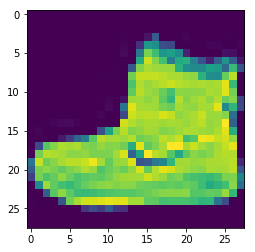

In [62]:
plt.imshow(x_train[0])

In [59]:
x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])
x_train = x_train/255
x_test = x_test/255

In [22]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (5, 5), padding="same"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
__________

In [30]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_train)

In [41]:
print(y_test[0])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [32]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [39]:
model.fit(x_train, y_train, validation_split=0.10, batch_size=64, epochs=1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 - 223s - loss: 0.0561 - acc: 0.9831 - val_loss: 0.5119 - val_acc: 0.9167


In [35]:
model.save('fashion_model_test.h5')

In [80]:
img_path = 'C:/Users/dakin/Documents/Development/ResonanceCompanies/imageSet/0b62cdbaecf94c2ac922ce6e43038b7d/image_1.jpg'
img = image.load_img(img_path)
img_data = img_data.reshape([-1, 28, 28, 1])
img_data = img_data/255

In [81]:
predictions = model.predict(img_data, batch_size=1)
predictions[0]
np.argmax(predictions[0])

6